## Titanic EDA using Speedml

This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset using the [Speedml](https://speedml.com) package.

> Speedml is a Python package for speed starting machine learning projects.

Speedml imports and initializes popular packages like pandas, xgboost, and sklearn, so you only need to import one package. Simple.

In [1]:
from speedml import Speedml

%matplotlib inline

## Initialize

Let us load the datasets, identify target variable `Survived` and unique id `PassengerId` using single call to Speedml.

Then return the shape information (#samples, #features) or (#features).

In [2]:
sml = Speedml('titanic/train.csv', 
              'titanic/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

Shape: train (891, 11) test (418, 10)
Numerical: train_n (6) test_n (5)


## Speed EDA

True to the goals of Speedml, we can run one command `sml.about()` to learn several EDA observations about our datasets.

In [3]:
print(sml.about())

You are running Speedml v0.9.1 (https://speedml.com)
Train and test datasets contain 1014 null values. Aim for zero.
Train dataset has 54% numerical features. Aim for 100%.
--------------------------------------------------
Numerical features are  ['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
	High-cardinality (>10) numerical features are  [('Age', 88), ('Fare', 248)]
	Categorical numerical features are  [('Survived', 2), ('Pclass', 3), ('SibSp', 7), ('Parch', 7)]
	Continuous features (~90% unique) are  []
--------------------------------------------------
Text features are  ['Embarked', 'Name', 'Sex', 'Ticket', 'Cabin']
	High-cardinality (>10) text features are  [('Ticket', 681), ('Cabin', 147)]
	Categorical text features are  [('Embarked', 3), ('Sex', 2)]
	Non-categorical text features (~90% unique) are  [('Name', 891)]
--------------------------------------------------



**Observations**

- Most model classifiers cannot handle NaN or null values. Data wrangle these to remove all null values.
- Models require numerical datasets so converting 100% of features to numerical is a data wrangling and feature engineering goal.
- High-cardinality features or features with lots of categories need to be addressed in a special manner for better model performance. One of the feature engineering strategies is banding of ranges of values for reducing the number of categories.
- Categorical numerical features can be plotted differently (plot bars, histograms) from high-cardinality or continuous features (use scatter plots).
- Non-categorical text features cannot be directly converted to numeric. These are candidates for feature extraction by identifying repeating patterns.

## Datasets

Speedml API exposes pandas methods directly so you can do with speedml what you can do with pandas.

In [4]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observations**

- The dataset contains several text features which need to be converted to numeric for model ready data.
- Name feature may contain inconsistent non-categorical data. Candidate for feature extraction and dropping.
- Is Ticket feature categorical? Do Ticket values remain same across multiple samples or passengers?

In [5]:
sml.train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
sml.train.info()
print('-'*40)
sml.test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2)

**Observations**

- Age feature contains null values which may need to be imputed.
- Cabin feature has a lot of null values
- Embarked feature has few null values for train dataset.

## Correlations

Plot correlation matrix heatmap for numerical features of the training dataset. Use this plot to understand if certain features are duplicate, are of low importance, or possibly high importance for our model.

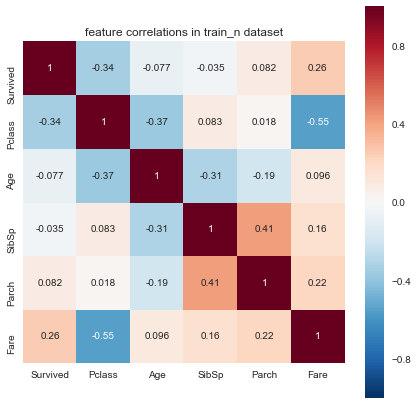

In [7]:
sml.plot.correlate()

## Distributions

Plot multiple feature distribution histogram plots for all numeric features. This helps understand skew of distribution from normal (horizontal middle) to quickly and relatively identify outliers in the dataset.

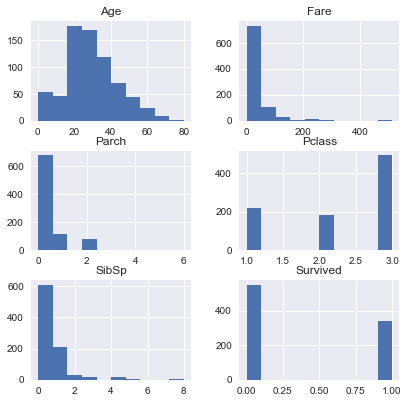

In [8]:
sml.plot.distribute()

## Outliers for categorical features

We use Violin plots on categorical features to note distribution of values across target variable and existence of any outliers (long thin lines extending out in the plots).

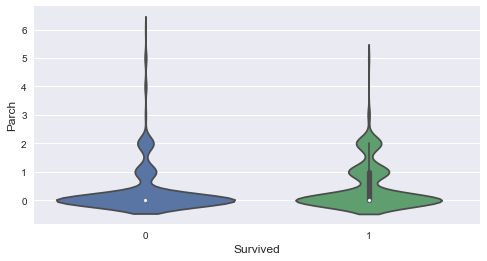

In [9]:
sml.plot.ordinal('Parch')

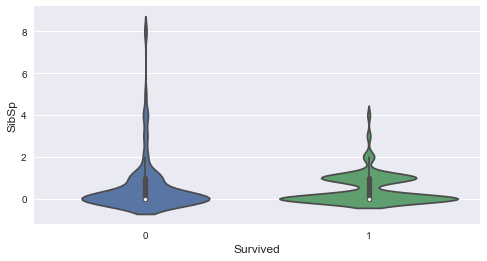

In [10]:
sml.plot.ordinal('SibSp')

**Observations**

- Parch contains outliers across the target variable values. The outliers seem to be distributed around 99 percentile mark on the upper value.
- SibSp also contains some outliers however these are not as pronounced as in case of Parch.

## Outliers for continuous features

We use scatter plots to determine outliers for continuous features. The further out and spread the upper or lower part of the curve, the more the outliers deviate from normal distribution.

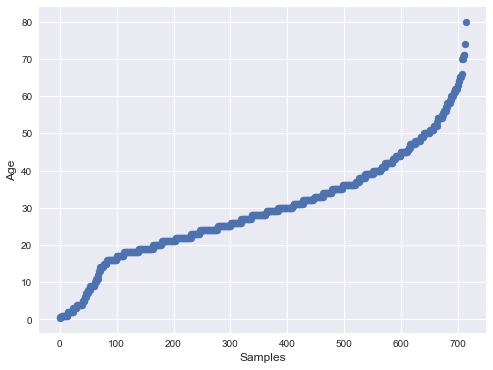

In [11]:
sml.plot.continuous('Age')

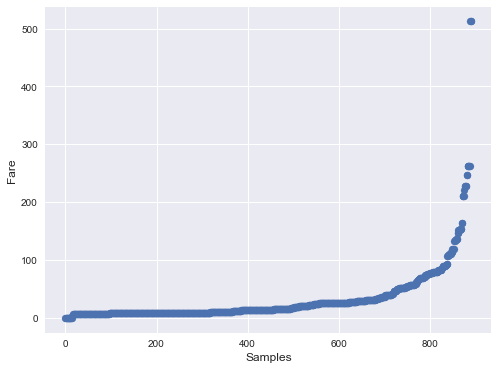

In [12]:
sml.plot.continuous('Fare')

**Observations**

- Clearly Fare feature has outliers around 99 percentile mark in the upper value range of around 500.
- Age does not seem to have any outliers of significance.

## Cross-tabulate features and target

Following analysis uses simple crosstab method to note how samples are distributed across target variable when classified by a certain feature.

In [13]:
sml.plot.crosstab('Survived', 'Pclass')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [14]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [15]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


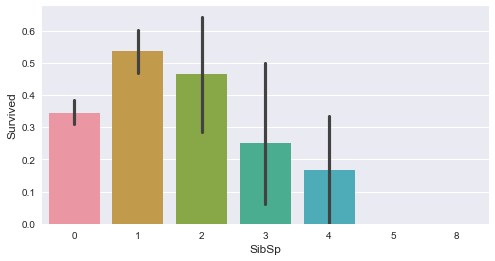

In [16]:
sml.plot.bar('SibSp', 'Survived')

In [17]:
sml.plot.crosstab('Survived', 'Sex')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [18]:
sml.plot.crosstab('Survived', 'Embarked')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


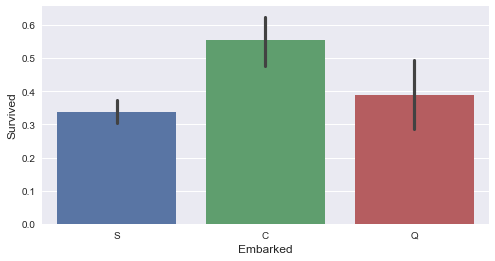

In [19]:
sml.plot.bar('Embarked', 'Survived')

## Compare Continuous and Categorical

You can compare continuous features (Fare, Age) with categorical features (Pclass, Parch, SibSp...) using a special kind of scatter plot called the strip plot.

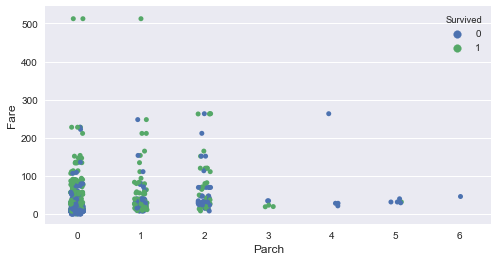

In [20]:
sml.plot.strip('Parch', 'Fare')

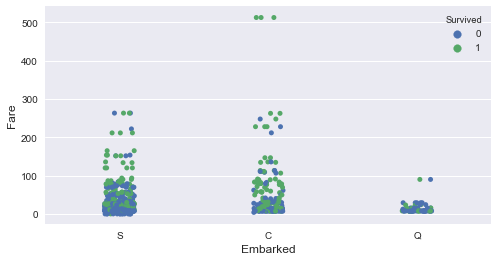

In [21]:
sml.plot.strip('Embarked', 'Fare')

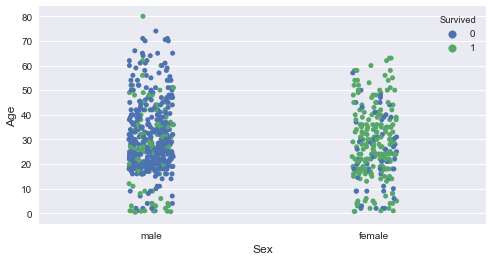

In [22]:
sml.plot.strip('Sex', 'Age')